In [10]:
import yfinance as yf
import pandas as pd
import math
import matplotlib.pyplot as plt
from termcolor import colored as cl

In [2]:
df = yf.download("META", start="2015-01-01", end="2020-01-01")

/home/jupyter/.cache/pypoetry/virtualenvs/compare-multiple-backtests-2J6ybkfi-py3.10/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [3]:
meta_df = df.reset_index().copy()

In [4]:
meta_df["sma5"] = meta_df["Close"].rolling(window=5).mean()
meta_df["sma8"] = meta_df["Close"].rolling(window=8).mean()
meta_df["sma13"] = meta_df["Close"].rolling(window=13).mean()

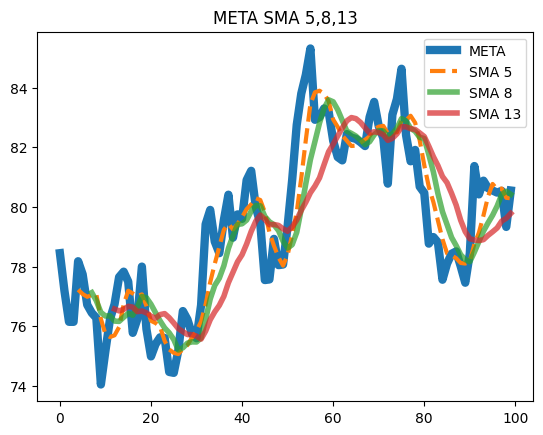

In [5]:
plt.plot(meta_df["Close"][:100], label="META", linewidth=6)
plt.plot(meta_df["sma5"][:100], label="SMA 5", linewidth=3, linestyle="--")
plt.plot(meta_df["sma8"][:100], label="SMA 8", linewidth=4, alpha=0.7)
plt.plot(meta_df["sma13"][:100], label="SMA 13", linewidth=4, alpha=0.7)
plt.title("META SMA 5,8,13")
plt.legend()

In [12]:
def implement_strategy(meta, investment):

    in_position = False
    equity = investment

    for i in range(1, len(meta)):
        if (
            meta["sma8"][i - 1] < meta["sma13"][i - 1]
            and meta["sma8"][i] > meta["sma13"][i]
            and meta["sma5"][i] > meta["sma8"][i]
            and meta["Close"][i] > meta["sma5"][i]
            and in_position == False
        ):
            no_of_shares = math.floor(equity / meta.Close[i])
            equity -= no_of_shares * meta.Close[i]
            in_position = True
            print(
                cl("BUY: ", color="green", attrs=["bold"]),
                f'{no_of_shares} Shares are bought at ${meta.Close[i]} on {str(meta["Date"][i])[:10]}',
            )
        elif (
            meta["sma8"][i - 1] > meta["sma13"][i - 1]
            and meta["sma8"][i] < meta["sma13"][i]
            and meta["sma5"][i] < meta["sma8"][i]
            and meta["Close"][i] < meta["sma5"][i]
            and in_position == True
        ):
            equity += no_of_shares * meta.Close[i]
            in_position = False
            print(
                cl("SELL: ", color="red", attrs=["bold"]),
                f'{no_of_shares} Shares are bought at ${meta.Close[i]} on {str(meta["Date"][i])[:10]}',
            )
    if in_position == True:
        equity += no_of_shares * meta.Close[i]
        print(
            cl(
                f'\nClosing position at {meta.Close[i]} on {str(meta["Date"][i])[:10]}',
                attrs=["bold"],
            )
        )
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f"EARNING: ${earning} ; ROI: {roi}%", attrs=["bold"]))


implement_strategy(meta_df, 100000)

BUY:  1303 Shares are bought at $76.70999908447266 on 2015-02-18
SELL:  1303 Shares are bought at $94.13999938964844 on 2015-08-03
BUY:  1316 Shares are bought at $93.23999786376953 on 2015-10-09
SELL:  1316 Shares are bought at $104.37999725341797 on 2015-12-03
BUY:  1259 Shares are bought at $109.11000061035156 on 2016-01-28
SELL:  1259 Shares are bought at $110.62999725341797 on 2016-04-08
BUY:  1202 Shares are bought at $115.8499984741211 on 2016-07-07
SELL:  1202 Shares are bought at $123.55999755859375 on 2016-08-19
BUY:  1173 Shares are bought at $126.54000091552734 on 2016-08-29
SELL:  1173 Shares are bought at $120.0 on 2016-11-03
BUY:  1171 Shares are bought at $120.20999908447266 on 2016-12-14
SELL:  1171 Shares are bought at $118.01000213623047 on 2016-12-27
BUY:  1107 Shares are bought at $124.9000015258789 on 2017-01-09
SELL:  1107 Shares are bought at $139.9199981689453 on 2017-04-11
BUY:  1078 Shares are bought at $143.67999267578125 on 2017-04-21
SELL:  1078 Shares are